### Modelo a usar Random Forest

In [1]:
import os
os.chdir("..")  # No reconoce la direccion local , debemos moverlo al directorio actual para que reconozca los archivos 
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\FerFisX\Desktop\prueba_Adrian


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from src.data_processing import load_and_preprocess_data
from src.pipeline import create_random_forest_pipeline
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

#### Cargado de datos y Procesamiento

In [3]:
data_path = '../prueba_Adrian/notebooks/dataset_alquiler.csv'
df = pd.read_csv(data_path)
#Aplicanda lo obtenido del EDA
df.loc[313:318, 'hora'] = range(13, 13 + 6)
df.loc[599:603, 'hora'] = range(2, 2 + 5)
df.loc[3:9, 'dia_semana'] = 6.0
df.loc[128:133, 'dia_semana'] = 4.0
media_total_alquileres = df['total_alquileres'].mean()
df['total_alquileres'] = df['total_alquileres'].fillna(media_total_alquileres)

# Definicion features (X) y objetivo (y)
X = df.drop(columns=['indice', 'u_casuales', 'u_registrados', 'total_alquileres', 'fecha'])
y = df['total_alquileres']
################## Separacion de Datos prueba y entrenamiento
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

#### Creacion y entrenamiento del Pipeline

In [4]:
# Creacion pipeline
ml_pipeline = create_random_forest_pipeline()
#Entrenamiento pipeline
print("\nEntrenando el pipeline...")
ml_pipeline.fit(X_train_raw, y_train)
print("Pipeline entrenado.")


Entrenando el pipeline...
Pipeline entrenado.


#### Predicciones del Modelo

In [5]:
predictions = ml_pipeline.predict(X_test_raw)

#### Evaluacion del Modelo...

In [8]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("\n--- Evaluación del Pipeline en el Conjunto de Prueba ---")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")


--- Evaluación del Pipeline en el Conjunto de Prueba ---
Error Cuadrático Medio (MSE): 6566.99
Raíz del Error Cuadrático Medio (RMSE): 81.04
Error Absoluto Medio (MAE): 54.31
Coeficiente de Determinación (R^2): 0.86


#### Guardado del modelo entrenado 

In [9]:
pipeline_path = '../Prueba_Adrian/models/rf_pipeline.joblib'
joblib.dump(ml_pipeline, pipeline_path)
print(f"\nPipeline guardado en: {pipeline_path}")


Pipeline guardado en: ../Prueba_Adrian/models/rf_pipeline.joblib


### Comparacion Prediccion vs Valores Reales

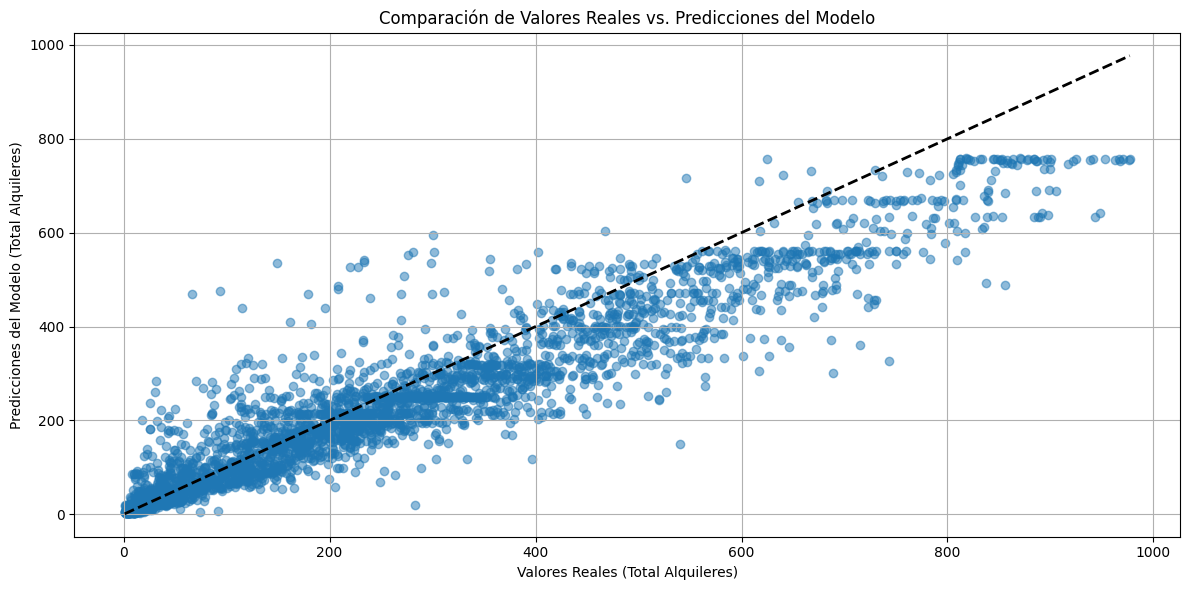

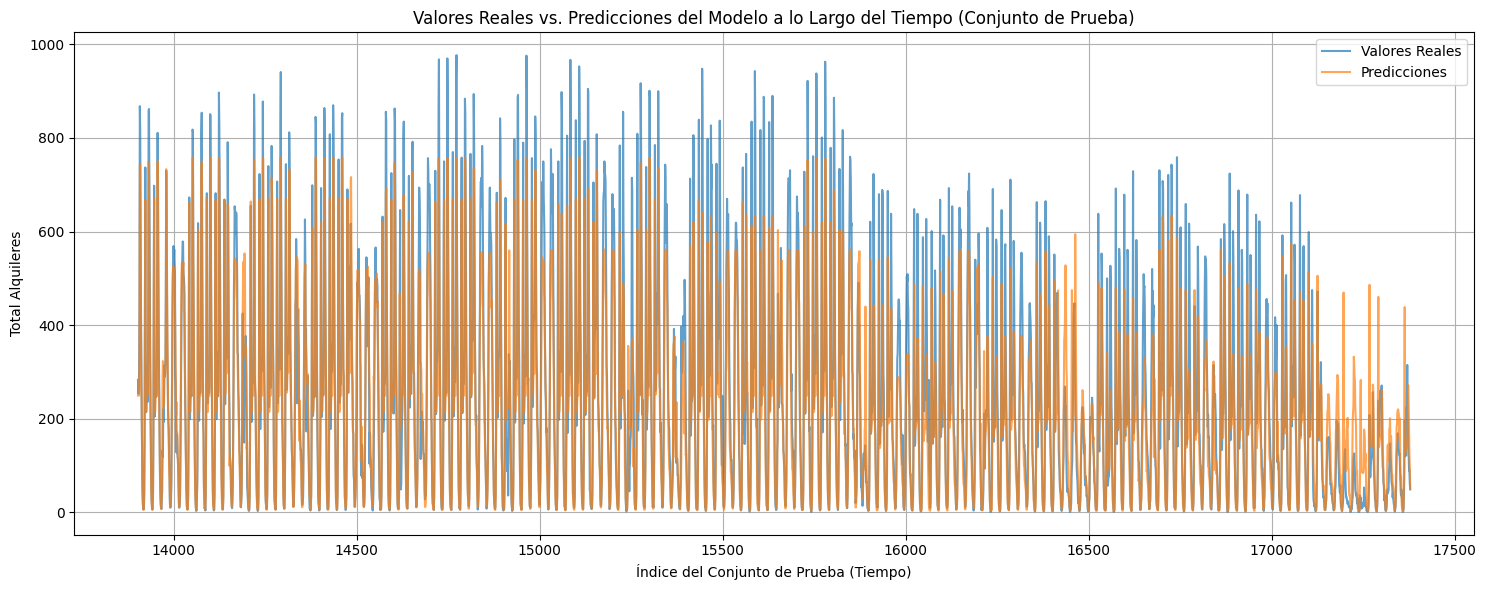

In [10]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Valores Reales (Total Alquileres)')
plt.ylabel('Predicciones del Modelo (Total Alquileres)')
plt.title('Comparación de Valores Reales vs. Predicciones del Modelo')
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.tight_layout()
plt.show()

# Gráfico de series de tiempo de una muestra de las predicciones
plt.figure(figsize=(15, 6))
predictions_df = pd.DataFrame({'real': y_test.values, 'predicted': predictions}, index=y_test.index)
plt.plot(predictions_df.index, predictions_df['real'], label='Valores Reales', alpha=0.7)
plt.plot(predictions_df.index, predictions_df['predicted'], label='Predicciones', alpha=0.7)
plt.xlabel('Índice del Conjunto de Prueba (Tiempo)')
plt.ylabel('Total Alquileres')
plt.title('Valores Reales vs. Predicciones del Modelo a lo Largo del Tiempo (Conjunto de Prueba)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
!pip install fastapi uvicorn